# Tutorial

## Downloading CRIRES+ data from the ESO archive

Before using `pycrires`, we will download a CRIRES+ dataset from the ESO archive. Let's import the `Eso` class from the `astroquery` package.

In [1]:
from astroquery.eso import Eso

Next, we create an instance of `Eso` and will login by providing a personal username. Login details can be requested at the [ESO User Portal](https://www.eso.org/UserPortal/registration).

In [2]:
eso = Eso()
eso.login("tstolker")

tstolker, enter your password:
········
INFO: Authenticating tstolker on www.eso.org... [astroquery.eso.core]
INFO: Authentication successful! [astroquery.eso.core]


For this tutorial, we will make use of the science verification data from ESO program [107.22SV.001](http://archive.eso.org/wdb/wdb/eso/abstract/query?progid=107.22SV.001). We first use the `query_instrument` function from `astroquery` to get a table with information about the files that are associated with this program.

In [3]:
table = eso.query_instrument('crires', column_filters={'prog_id': '107.22SV.001'})

Since there were two wavelength settings used, we make sure to only query and download the *K2166* data.

In [4]:
table = table[table['INS WLEN ID'] == 'K2166']
print(table)

Release Date     Object         RA      DEC    ... INS GRAT2 ID INS FILT1 NAME DIMM Seeing-avg
------------ -------------- --------- -------- ... ------------ -------------- ---------------
  2021-09-16 LAMP,METROLOGY 83.695687 -5.57034 ...            K         Hx1e-3     1.98 [1.39]
  2021-09-16 LAMP,METROLOGY 83.695687 -5.57034 ...            K         Hx1e-3     1.99 [1.40]
  2021-09-16 LAMP,METROLOGY 83.695687 -5.57034 ...            K         Hx1e-3     1.99 [1.40]
  2021-09-16 LAMP,METROLOGY 83.695687 -5.57034 ...            K         Hx1e-3     1.99 [1.40]
         ...            ...       ...      ... ...          ...            ...             ...
  2021-09-16       HD 36917 83.696524 -5.57034 ...            K              K     1.97 [1.39]
  2021-09-16       HD 36917  83.69485 -5.57034 ...            K              K     1.93 [1.34]
  2021-09-16       HD 36917 83.696524 -5.57034 ...            K              K             N/A
  2021-09-16       HD 36917 83.696524 -5.57034 ...

We also create a folder called *raw* in which `pycrires` will look for the raw data files.

In [5]:
import os
if not os.path.exists('./raw'):
    os.makedirs('./raw')

Now we can download the data, including the raw calibration files, to the *raw* folder with the `retrieve_data` method of the `Eso` object.

In [6]:
data_files = eso.retrieve_data(table['DP.ID'][table['INS WLEN ID'] == 'K2166'],
                               destination='./raw',
                               continuation=False,
                               with_calib='raw',
                               request_all_objects=True,
                               unzip=False)

INFO: Checking availability of datasets to download... [astroquery.eso.core]
INFO: Downloading datasets... [astroquery.eso.core]
INFO: Contacting retrieval server... [astroquery.eso.core]
INFO: Staging request... [astroquery.eso.core]
INFO: Staging form is at https://dataportal.eso.org/rh/requests/tstolker/658317 [astroquery.eso.core]
INFO: Detecting already downloaded datasets, including calibrations... [astroquery.eso.core]
INFO: Downloading 40 files... [astroquery.eso.core]
INFO: Downloading file 1/40: CRIRE.2021-09-16T08:08:03.562.xml... [astroquery.eso.core]
INFO: Copying file CRIRE.2021-09-16T08:08:03.562.xml to ./raw... [astroquery.eso.core]
INFO: Downloading file 2/40: CRIRE.2021-09-16T11:46:59.817.fits.Z... [astroquery.eso.core]
INFO: Copying file CRIRE.2021-09-16T11:46:59.817.fits.Z to ./raw... [astroquery.eso.core]
INFO: Downloading file 3/40: CRIRE.2021-09-16T08:07:48.492.xml... [astroquery.eso.core]
INFO: Copying file CRIRE.2021-09-16T08:07:48.492.xml to ./raw... [astroque

INFO: Copying file CRIRE.2021-09-16T12:07:34.059.fits.Z to ./raw... [astroquery.eso.core]
INFO: Downloading file 20/40: M.CRIRES.2021-10-12T09:09:45.716.fits... [astroquery.eso.core]
INFO: Copying file M.CRIRES.2021-10-12T09:09:45.716.fits to ./raw... [astroquery.eso.core]
INFO: Downloading file 21/40: CRIRE.2021-09-16T12:10:54.870.fits.Z... [astroquery.eso.core]
INFO: Copying file CRIRE.2021-09-16T12:10:54.870.fits.Z to ./raw... [astroquery.eso.core]
INFO: Downloading file 22/40: CRIRE.2021-09-16T08:23:47.666.fits.Z... [astroquery.eso.core]
INFO: Copying file CRIRE.2021-09-16T08:23:47.666.fits.Z to ./raw... [astroquery.eso.core]
INFO: Downloading file 23/40: CRIRE.2021-09-16T12:07:46.626.fits.Z... [astroquery.eso.core]
INFO: Copying file CRIRE.2021-09-16T12:07:46.626.fits.Z to ./raw... [astroquery.eso.core]
INFO: Downloading file 24/40: CRIRE.2021-09-16T08:08:03.562.NL.txt... [astroquery.eso.core]
INFO: Copying file CRIRE.2021-09-16T08:08:03.562.NL.txt to ./raw... [astroquery.eso.core

INFO: Copying file CRIRE.2021-09-16T08:09:54.240.fits.Z to ./raw... [astroquery.eso.core]
INFO: Downloading file 39/40: CRIRE.2021-09-16T12:07:21.520.fits.Z... [astroquery.eso.core]
INFO: Copying file CRIRE.2021-09-16T12:07:21.520.fits.Z to ./raw... [astroquery.eso.core]
INFO: Downloading file 40/40: CRIRE.2021-09-16T08:08:03.562.fits.Z... [astroquery.eso.core]
INFO: Copying file CRIRE.2021-09-16T08:08:03.562.fits.Z to ./raw... [astroquery.eso.core]
INFO: Done! [astroquery.eso.core]


IMPORTANT: Now we need to go to the *raw* folder and manually uncompress the *.fits.Z* files, for example with the `uncompress` command. Setting `unzip=True` in `retrieve_data` caused an error when testing.

## Running the pipeline

Now we can start the data reduction by first importing the `Pipeline` from the `pycrires` package.

In [18]:
from pycrires import Pipeline

Next, we create an instance of `Pipeline`. The argument provides the path in which the *raw* folder is located (i.e. the folder where the compressed FITS files were downloaded).

In [19]:
pipeline = Pipeline('./')

Pipeline for VLT/CRIRES+

Data reduction folder: /Users/tomasstolker/applications/pycrires/docs
Creating header DataFrame
Creating dictionary for filenames
Available EsoRex recipes for CRIRES+:
   -  cr2res_obs_2d         : 2D Observation recipe
   -  cr2res_util_genlines  : Generate spectrum calibration FITS tables
   -  cr2res_util_wave      : Wavelength Calibration
   -  cr2res_util_bpm_split : BPM splitting utility
   -  cr2res_util_plot      : Plotting utility
   -  cr2res_cal_wave       : Wavelength Calibration
   -  cr2res_obs_staring    : Staring Observation recipe
   -  cr2res_util_trace     : Trace utility
   -  cr2res_cal_detlin     : Detector Linearity recipe
   -  cr2res_util_slit_curv : Slit Curvature utility
   -  cr2res_cal_flat       : Flat recipe
   -  cr2res_util_trace_map : TRACE_WAVE maps creation
   -  cr2res_util_calib     : Calibration utility
   -  cr2res_util_extract   : Optimal Extraction utility
   -  cr2res_obs_nodding    : Nodding Observation recipe
   -  

Now we can run all the required methods of `Pipeline` to process both the calibration and science data.

In [20]:
pipeline.rename_files()


--------------
Renaming files
--------------

Science data:

   - CRIRE.2021-09-16T08:09:54.240.fits
   - CRIRE.2021-09-16T08:11:44.591.fits
   - CRIRE.2021-09-16T08:13:19.322.fits
   - CRIRE.2021-09-16T08:15:17.201.fits
   - CRIRE.2021-09-16T08:16:49.947.fits
   - CRIRE.2021-09-16T08:18:45.680.fits
   - CRIRE.2021-09-16T08:20:23.794.fits
   - CRIRE.2021-09-16T08:22:14.759.fits
   - CRIRE.2021-09-16T08:23:47.666.fits
   - CRIRE.2021-09-16T08:25:50.890.fits
   - CRIRE.2021-09-16T08:27:28.073.fits
   - CRIRE.2021-09-16T08:29:26.290.fits

Calibration data:

   - CRIRE.2021-09-16T08:07:04.403.fits
   - CRIRE.2021-09-16T08:07:33.526.fits
   - CRIRE.2021-09-16T08:07:48.492.fits
   - CRIRE.2021-09-16T08:08:03.562.fits
   - CRIRE.2021-09-16T11:46:50.146.fits
   - CRIRE.2021-09-16T11:46:59.817.fits
   - CRIRE.2021-09-16T11:47:09.493.fits
   - CRIRE.2021-09-16T11:50:13.506.fits
   - CRIRE.2021-09-16T12:02:09.650.fits
   - CRIRE.2021-09-16T12:03:45.000.fits
   - CRIRE.2021-09-16T12:05:20.406.fit

In [21]:
pipeline.extract_header()


-----------------------
Extracting FITS headers
-----------------------

Creating new DataFrame...

Exporting DataFrame to header.csv
Exporting DataFrame to header.xlsx

-------------------
Observation details
-------------------

RA Dec = 05h34m46.96488s -05d34m13.224s
Target = HD 36917
Program ID = 107.22SV.001
Wavelength setting = K2166
Central wavelength (nm) = 2166.016
Position angle (deg) = 90.0
Slit width (arcsec) = 0.2
Grating order = 26.0

Observation ID:
   - 3150826.0 -> 16 files
   - 200163466.0 -> 13 files
   - nan -> 0 files


In [22]:
pipeline.cal_dark(verbose=False)


------------------
Create master dark
------------------

Unique DIT values: {1.427049, 90.0, 60.0}

Creating SOF file:
   - raw/CRIRES_SPEC_DARK259_0124.fits DARK
   - raw/CRIRES_SPEC_DARK259_0125.fits DARK
   - raw/CRIRES_SPEC_DARK259_0126.fits DARK
   - raw/CRIRES_SPEC_DARK259_0127.fits DARK
   - raw/CRIRES_SPEC_DARK259_0128.fits DARK
   - raw/CRIRES_SPEC_DARK259_0129.fits DARK
   - raw/CRIRES_SPEC_DARK259_0130.fits DARK
   - raw/CRIRES_SPEC_DARK259_0131.fits DARK
   - raw/CRIRES_SPEC_DARK259_0132.fits DARK

Running EsoRex... [DONE]


In [23]:
# pipeline.cal_flat(verbose=False)

In [24]:
pipeline.run_skycalc()


-----------
Run SkyCalc
-----------

Retrieving telluric spectrum with SkyCalc... [DONE]

Storing spectrum: calib/sky_spec.dat


In [25]:
pipeline.util_genlines(verbose=False)


-----------------------
Generate telluric table
-----------------------

Creating SOF file:
   - calib/sky_spec.dat EMISSION_LINES_TXT

Running EsoRex... [DONE]


In [26]:
pipeline.util_trace(verbose=False)


-------------
Detect traces
-------------

Creating SOF file:
   - raw/CRIRES_SPEC_FLAT259_0019.fits FLAT
   - raw/CRIRES_SPEC_FLAT259_0020.fits FLAT
   - raw/CRIRES_SPEC_FLAT259_0021.fits FLAT

Running EsoRex... [DONE]


In [27]:
pipeline.cal_wave(verbose=False)


----------------------
Wavelength calibration
----------------------

Creating SOF file:
   - raw/CRIRES_SPEC_WAVE259_0009.fits WAVE_FPET
   - calib/CRIRES_SPEC_FLAT259_0019_tw.fits UTIL_TRACE_TW
   - calib/sky_spec.fits.fits EMISSION_LINES

Running EsoRex...

/Users/tomasstolker/applications/pycrires/pycrires/pipeline.py:710: UserWarning: The 'raw' folder does not contain any DPR.TYPE=WAVE,UNE file.
  warnings.warn("The \'raw\' folder does not contain "


 [DONE]


In [28]:
pipeline.obs_nodding(verbose=False)


----------------------
Process nodding frames
----------------------

Unique DIT values: {90.0}

Creating SOF file:
   - raw/CRIRES_SPEC_OBS259_0112.fits CAL_NODDING_JITTER
   - raw/CRIRES_SPEC_OBS259_0113.fits CAL_NODDING_JITTER
   - raw/CRIRES_SPEC_OBS259_0114.fits CAL_NODDING_JITTER
   - raw/CRIRES_SPEC_OBS259_0115.fits CAL_NODDING_JITTER
   - raw/CRIRES_SPEC_OBS259_0116.fits CAL_NODDING_JITTER
   - raw/CRIRES_SPEC_OBS259_0117.fits CAL_NODDING_JITTER
   - raw/CRIRES_SPEC_OBS259_0118.fits CAL_NODDING_JITTER
   - raw/CRIRES_SPEC_OBS259_0119.fits CAL_NODDING_JITTER
   - raw/CRIRES_SPEC_OBS259_0120.fits CAL_NODDING_JITTER
   - raw/CRIRES_SPEC_OBS259_0121.fits CAL_NODDING_JITTER
   - raw/CRIRES_SPEC_OBS259_0122.fits CAL_NODDING_JITTER
   - raw/CRIRES_SPEC_OBS259_0123.fits CAL_NODDING_JITTER
   - calib/CRIRES_SPEC_FLAT259_0019_tw.fits UTIL_TRACE_TW

Running EsoRex...

/Users/tomasstolker/applications/pycrires/pycrires/pipeline.py:1016: UserWarning: Could not find a master flat.
  warnings.warn("Could not find a master flat.")


 [DONE]


Finally, we will plot the extracted spectra of nod A.

In [29]:
pipeline.plot_spectra(nod_ab='A')


------------
Plot spectra
------------

Spectrum file: cr2res_obs_nodding_extractedA.fits
Reading FITS of nod A... [DONE]
Plotting spectra... [DONE]


<Figure size 576x1008 with 0 Axes>

<Figure size 576x1008 with 0 Axes>

<Figure size 576x1008 with 0 Axes>

Let's have a look at the extracted spectra!

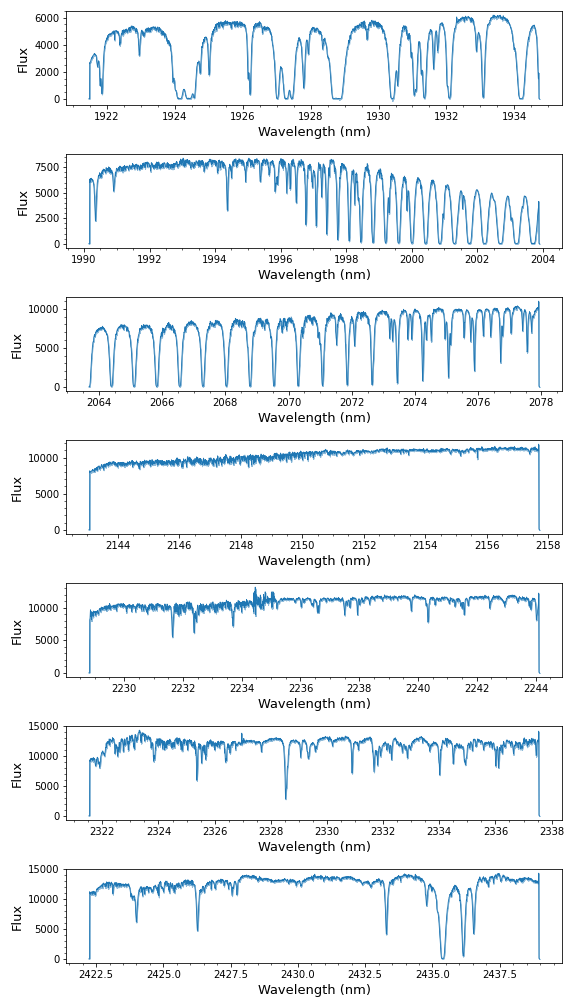

In [30]:
from IPython.display import Image
Image('product/spectra_A_1.png')